In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

races = pd.read_csv('race.csv')
runners = pd.read_csv('ultra_rankings.csv')

#races record information for each individual races (location, id, elevation 
#etc. runners record each contestant (on high rankings) performance for each
#of these races. The merge key for the two datasets is the race_year_id

Original repo here: 
https://github.com/rfordatascience/tidytuesday/tree/master/data/2021/2021-10-26

In [2]:
#So we've got 137803 individual entries in race results and 1207 unique 
#races at hand.
print(len(runners))
print(len(races))

137803
1207


In [3]:
#Merge the 2 datasets by race id
merged = pd.merge(runners,races, on='race_year_id')
merged.head()

#The race info is redundant because there are multiple contestants for
#a single race... but we could work with that for now

,race_year_id,rank,runner,time,age,gender,nationality,time_in_seconds,event,race,city,country,date,start_time,participation,distance,elevation_gain,elevation_loss,aid_stations,participants
0,68140,1.0,VERHEUL Jasper,26H 35M 25S,30,M,GBR,95725.0,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150
1,68140,2.0,MOULDING JON,27H 0M 29S,43,M,GBR,97229.0,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150
2,68140,3.0,RICHARDSON Phill,28H 49M 7S,38,M,GBR,103747.0,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150
3,68140,4.0,DYSON Fiona,30H 53M 37S,55,W,GBR,111217.0,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150
4,68140,5.0,FRONTERAS Karen,32H 46M 21S,48,W,GBR,117981.0,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150


In [4]:
#Since we are interested in average speed, we create that column:
merged['average_speed'] = merged['distance'] / (merged['time_in_seconds']/3600)
merged.head()
#Unit for average_speed is km/hour

,race_year_id,rank,runner,time,age,gender,nationality,time_in_seconds,event,race,...,country,date,start_time,participation,distance,elevation_gain,elevation_loss,aid_stations,participants,average_speed
0,68140,1.0,VERHEUL Jasper,26H 35M 25S,30,M,GBR,95725.0,Peak District Ultras,Millstone 100,...,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150,6.276730
1,68140,2.0,MOULDING JON,27H 0M 29S,43,M,GBR,97229.0,Peak District Ultras,Millstone 100,...,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150,6.179638
2,68140,3.0,RICHARDSON Phill,28H 49M 7S,38,M,GBR,103747.0,Peak District Ultras,Millstone 100,...,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150,5.791396
3,68140,4.0,DYSON Fiona,30H 53M 37S,55,W,GBR,111217.0,Peak District Ultras,Millstone 100,...,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150,5.402412
4,68140,5.0,FRONTERAS Karen,32H 46M 21S,48,W,GBR,117981.0,Peak District Ultras,Millstone 100,...,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150,5.092684


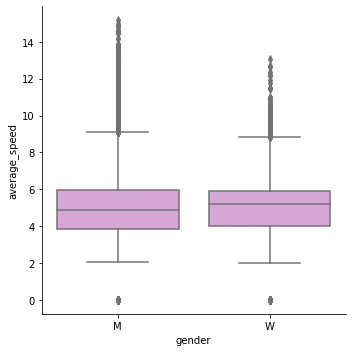

In [5]:
# Exploratory Data Analysis - Average Speed vs. Gender

# Drop 1st Max Outlier
max_speed = merged["average_speed"].max()
max_speed_index = merged.index[merged["average_speed"] == max_speed]

merged = merged.drop(index = max_speed_index)


# Drop 2nd Max Outlier
max_speed2 = merged["average_speed"].max()
max_speed_index2 = merged.index[merged["average_speed"] == max_speed2]

merged = merged.drop(index = max_speed_index2)


sns.catplot(x = "gender", y = "average_speed", kind = "box", data = merged, color = "plum")

<AxesSubplot:xlabel='nationality'>

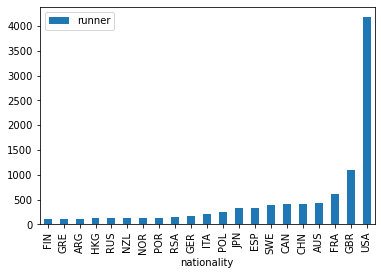

In [6]:
# Nationalities with at least 100 top 10 runners
top10 = merged[merged["rank"] <= 10]

top10_count = top10.groupby("nationality")["runner"].count().sort_values()

dftop10_count = pd.DataFrame(top10_count)

df = top10_count.to_frame()
df_100 = df[df["runner"] >=100]
df_100.reset_index().plot(x='nationality', y='runner', kind = "bar")

<AxesSubplot:xlabel='nationality'>

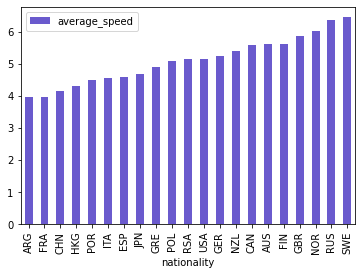

In [7]:
# Compare Average Speeds for countries with at least 100 top 10 runners

df_100_inner = merged.merge(df_100, on = "nationality")

df_100_inner_avg_speed = df_100_inner.groupby("nationality")["average_speed"].mean("average_speed").sort_values()
df_100_inner_avg_speed = pd.DataFrame(df_100_inner_avg_speed)

df_100_inner_avg_speed.reset_index().plot(x='nationality', y='average_speed', kind = "bar", color = "slateblue")

In [8]:
# # Male and Female Composition for Countries with at least 100 top 10 runners
# df_100_inner.groupby(['nationality', 'gender']).size().unstack().plot(kind='bar', stacked=True)

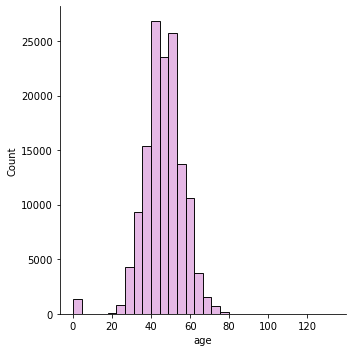

In [9]:
# Distribution of Age

sns.displot(data = merged, bins = 30, x = "age", color = "plum")

<AxesSubplot:xlabel='age', ylabel='average_speed'>

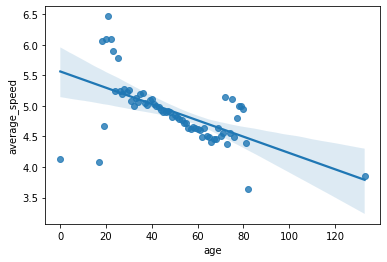

In [10]:
# EDA Relationship Between average_speed and age

age_avg_speed = merged.groupby("age")["average_speed"].mean("average_speed")
age_avg_speed

age_avg_speed_df = pd.DataFrame(age_avg_speed)
age_avg_speed_df

# age_avg_speed_df.reset_index().plot(x='age', y='average_speed', kind = "scatter")
sns.regplot(x=age_avg_speed_df.index, y="average_speed", data=age_avg_speed_df)
# sns.relplot(data = merged, x = "age", y = "average_speed")

<AxesSubplot:xlabel='aid_stations', ylabel='average_speed'>

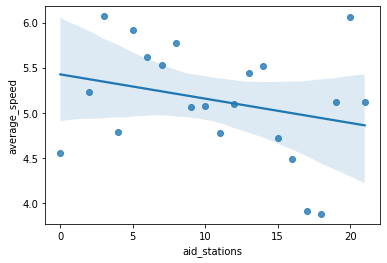

In [11]:
# EDA Relationship Between average_speed and aid_stations

top10_count1 = top10.groupby("aid_stations")["runner"].count().sort_index()

dftop10_count1 = pd.DataFrame(top10_count1)

df1 = top10_count1.to_frame()
df_100_1 = df1[df1["runner"] >=100]

df_100_inner1 = merged.merge(df_100_1, on = "aid_stations")

df_100_inner_avg_speed1 = df_100_inner1.groupby("aid_stations")["average_speed"].mean("average_speed").sort_index()
df_100_inner_avg_speed1 = pd.DataFrame(df_100_inner_avg_speed1)

sns.regplot(x=df_100_inner_avg_speed1.index, y="average_speed", data=df_100_inner_avg_speed1)

<AxesSubplot:xlabel='distance', ylabel='average_speed'>

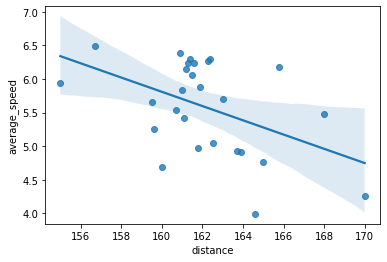

In [12]:
# EDA Relationship Between average_speed and distance
top10_count2 = top10.groupby("distance")["runner"].count().sort_index()

dftop10_count2 = pd.DataFrame(top10_count2)

df2 = top10_count2.to_frame()
df_100_2 = df2[df2["runner"] >=100]


df_100_inner2 = merged.merge(df_100_2, on = "distance")

df_100_inner_avg_speed2 = df_100_inner2.groupby("distance")["average_speed"].mean("average_speed").sort_index()

df_100_inner_avg_speed2 = pd.DataFrame(df_100_inner_avg_speed2)

df_100_inner_avg_speed2

dropped = df_100_inner_avg_speed2[df_100_inner_avg_speed2["average_speed"] > 0]

sns.regplot(x=dropped.index, y="average_speed", data=dropped)


/var/folders/tf/jzjw6k3148dck9lhd_v_jd180000gn/T/ipykernel_36499/667400875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10["net_elevation"] = top10["elevation_gain"] + top10["elevation_loss"]


<AxesSubplot:xlabel='net_elevation', ylabel='average_speed'>

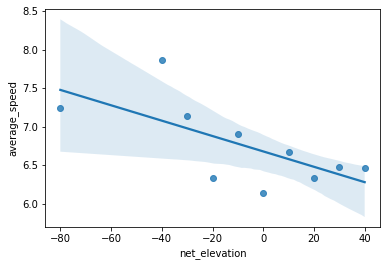

In [13]:
# EDA Relationship Between average_speed and net_elevation
top10["net_elevation"] = top10["elevation_gain"] + top10["elevation_loss"]
top10

top10_count3 = top10.groupby("net_elevation")["runner"].count().sort_index()

dftop10_count3 = pd.DataFrame(top10_count3)
dftop10_count3

df_100_3 = dftop10_count3[dftop10_count3["runner"] >=100]
df_100_3


df_100_inner3 = top10.merge(df_100_3, on = "net_elevation")
df_100_inner3

df_100_inner_avg_speed3 = df_100_inner3.groupby("net_elevation")["average_speed"].mean("average_speed").sort_index()

df_100_inner_avg_speed3 = pd.DataFrame(df_100_inner_avg_speed3)

df_100_inner_avg_speed3



sns.regplot(x=df_100_inner_avg_speed3.index, y="average_speed", data=df_100_inner_avg_speed3)

In [14]:
# Linear model: average_speed as a linear function of aid_stations, net_elevation, and distance
numerical2 = top10[['aid_stations', 'net_elevation', 'distance']].values
linear_target2 = top10['average_speed'].values

linear_model2 = LinearRegression()
linear_model2.fit(X=numerical2, y=linear_target2)
predicted2 = linear_model2.predict(numerical2)

mse2 = mean_squared_error(linear_target2, predicted2)
r2_2 = r2_score(linear_target2, predicted2)
print("Model MSE:", mse2, "r^2:", r2_2)


Model MSE: 2.767723073022392 r^2: 0.46269039838784487


In [15]:
# Linear Model: average_speed as a linear function of gender, age, and nationality
categorical = OneHotEncoder().fit_transform(top10[['gender', "nationality"]].values).toarray()
numerical = top10[['age']].values
linear_data = np.append(categorical, numerical, axis=1)
linear_target = top10['average_speed'].values

linear_model = LinearRegression()
linear_model.fit(X=linear_data, y=linear_target)
predicted = linear_model.predict(linear_data)

mse = mean_squared_error(linear_target, predicted)
r2 = r2_score(linear_target, predicted)
print("Model MSE:", mse, "r^2:", r2)

Model MSE: 4.664114179153779 r^2: 0.09453609867910151


In [16]:
#We can start by computing the average of average_speed for male & female 
#contestants 
merged.groupby(['gender']).mean('average_speed')['average_speed']

#Notice the result is very close, but again we do have lots of entries for
#both gender. We can do a hypothesis test to figure out if such tiny diffe
#erence is significant by performing a bootstrap sampling:

gender
M    4.884041
W    4.884091
Name: average_speed, dtype: float64

In [17]:
#first grab the average speed for male and female runners across all races
male = merged[merged['gender'] == 'M']
female = merged[merged['gender'] == 'W']
male_speed = male['average_speed'].dropna()
female_speed = female['average_speed'].dropna()

#perform bootstrapping: repeat 500 times
import numpy as np
reps = 500
male_bootstrap = np.random.choice(male_speed, size=(reps,len(male_speed)),replace = True)
female_bootstrap = np.random.choice(female_speed, size=(reps,len(female_speed)),replace = True)

#Then compute the mean for each bootstrap sample
male_boot_mean = male_bootstrap.mean(axis=1)
female_boot_mean = female_bootstrap.mean(axis=1)

#Confidence interval for average of average speed for male & female runners
male_ci_lower = np.percentile(male_boot_mean, 2.5)
male_ci_higher = np.percentile(male_boot_mean, 97.5)
female_ci_lower = np.percentile(female_boot_mean, 2.5)
female_ci_higher = np.percentile(female_boot_mean, 97.5)

print(male_ci_lower,male_ci_higher)
print(female_ci_lower,female_ci_higher)

4.873501480520077 4.8950111799531335
4.858207201656997 4.911871454712931


Conclusion: Since the two confidence intervals actually overlap, so we conclude that the average speed for male and female runners are not significantly different

In [18]:
import pandas as pd
import seaborn as sns
races = pd.read_csv('race.csv')
runners = pd.read_csv('ultra_rankings.csv')
merged = pd.merge(runners,races, on='race_year_id')
merged['average_speed'] = merged['distance'] / (merged['time_in_seconds']/3600)
merged = merged.dropna()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [19]:
# Baseline: average_speed as a linear function of gender and age
baseline_categorical = OneHotEncoder().fit_transform(merged[['gender']].values).toarray()
baseline_numerical = merged[['age']].values
baseline_data = np.append(baseline_categorical, baseline_numerical, axis=1)
baseline_target = merged['average_speed'].values

linear_model = LinearRegression()
linear_model.fit(X=baseline_data, y=baseline_target)
baseline = linear_model.predict(baseline_data)

baseline_mse = mean_squared_error(baseline_target, baseline)
baseline_r2 = r2_score(baseline_target, baseline)
print("Model MSE:", baseline_mse, "r^2:", baseline_r2)

Model MSE: 3.3508734975596166 r^2: 0.007204488818786436


In [20]:
# Model: average_speed as a linear function of gender, age, and nationality
categorical = OneHotEncoder().fit_transform(merged[['gender', "nationality"]].values).toarray()
numerical = merged[['age']].values
linear_data = np.append(categorical, numerical, axis=1)
linear_target = merged['average_speed'].values

linear_model = LinearRegression()
linear_model.fit(X=linear_data, y=linear_target)
predicted = linear_model.predict(linear_data)

mse = mean_squared_error(linear_target, predicted)
r2 = r2_score(linear_target, predicted)
print("Model MSE:", mse, "r^2:", r2)

Model MSE: 2.801268536818721 r^2: 0.17004123522054482


In [21]:
# Split data
from sklearn.model_selection import train_test_split

logistic_target = merged['nationality']
train_data, test_data, train_target, test_target = train_test_split(
    merged, logistic_target, test_size=0.7, random_state=999)

In [22]:
# # Create and fit a logistic regression model to predict the nationality using gender, age, and average_speed
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn import metrics
# import matplotlib.pyplot as plt

# categorical_train = OneHotEncoder().fit_transform(train_data[['gender']].values).toarray()
# numerical_train = train_data[['age', 'average_speed']].values
# train_data = np.append(categorical_train, numerical_train, axis=1)

# categorical_test = OneHotEncoder().fit_transform(test_data[['gender']].values).toarray()
# numerical_test = test_data[['age', 'average_speed']].values
# test_data = np.append(categorical_test, numerical_test, axis=1)

# logistic_model = LogisticRegression(max_iter=1000)
# logistic_model.fit(X=train_data, y=train_target)
# logistic_predicted = logistic_model.predict(test_data)

# score = accuracy_score(y_true=test_target, y_pred=logistic_predicted)

# ConfusionMatrixDisplay.from_predictions(y_true=test_target, y_pred=logistic_predicted)
# plt.grid(False)

# print("Model classification accuracy:", score)